In [1]:
import transformers
import tensorflow as tf

/mnt/c/Users/DaMarcus/Documents/proj/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2024-04-08 18:35:48.874853: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-04-08 18:35:56.826255: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-08 18:36:30.384650: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find

In [2]:
transformers.__version__

'4.39.0'

In [3]:
tf.__version__

'2.16.1'

In [28]:
import pandas as pd
import os
import numpy as np
import re

In [29]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import matplotlib
from sklearn.feature_extraction.text import CountVectorizer

In [3]:
# import these modules
from nltk.stem import WordNetLemmatizer
  
# import SyllableTokenizer() method from nltk 
from nltk import word_tokenize, sent_tokenize

import nltk

from nltk.corpus import stopwords
 


In [4]:
import spacy
from spacy import displacy

In [5]:
#nltk.download('punkt')
#nltk.download('stopwords')
#nltk.download('wordnet')
#nltk.download('averaged_perceptron_tagger')

# Text Stats & Sentiment Analysis
isidewith; controversial topics
lemmatization, n grams
word counts; word clouds
dependency parsing
named entity recognition
coreference resolution
sentiment analysis

Topic Modeling
topic modeling
dominant topics
canonical phrases
dynamic topic modeling
seeded topic modeling
feedback stopwords for topics

Classification
BERT

In [6]:
text_folder = '/mnt/d/Документы/M/proj/pnlp/text'

## Explore
Load data, word counts, excerpt

### Load Data

In [7]:
d2020, r2020 = '', ''
with open(text_folder + '/2020D.txt') as f: d2020 = f.read()
with open(text_folder + '/2020R.txt') as f: r2020 = f.read()

In [8]:
len(d2020.split(' ')), d2020[:2000]

(41590,
 'DEMOCRATIC NATIONAL CONVENTION LAND ACKNOWLEDGEMENT\nThe Democratic National Committee wishes to acknowledge that we gather together to state our values on lands that have been stewarded through many centuries by the ancestors and descendants of Tribal Nations who have been here since time immemorial.\n\nWe honor the communities native to this continent, and recognize that our country was built on Indigenous homelands.\n\nWe pay our respects to the millions of Indigenous people throughout history who have protected our lands, waters, and animals.\n\nWe respectfully acknowledge that we present this Platform at our 2020 Democratic National Convention on the lands of the Bad River Band of the Lake Superior Tribe of Chippewa Indians, the Forest County Potawatomi Community, the Ho-Chunk Nation, the Lac Courte Oreilles Band of Lake Superior Chippewa, the Lac du Flambeau Band of Lake Superior Chippewa, the Menominee Nation, the Oneida Nation of Wisconsin, the Red Cliff Band of Lake 

In [9]:
len(r2020.split(' ')),r2020[:2000]

(35205,
 "We dedicate this platform with admiration and gratitude\n* * * * *\nTo all who stand strong in the face of danger\nSo that the American people may be protected against it —\nThe men and women of our military,\nof our law enforcement, and the first responders\nof every community in our land —\nAnd to their families.\n\nPreamble\nWith this platform, we the Republican Party reaffirm the principles that unite us in a common purpose.\nWe believe in American exceptionalism.\n\nWe believe the United States of America is unlike any other nation on earth.\n\nWe believe America is exceptional because of our historic role — first as refuge, then as defender, and now as exemplar of liberty for the world to see.\n\nWe affirm — as did the Declaration of Independence: that all are created equal, endowed by their Creator with inalienable rights of life, liberty, and the pursuit of happiness.\n\nWe believe in the Constitution as our founding document.\n\nWe believe the Constitution was writte

In [10]:
pos_map = {'J':'a',
           'V':'v',
           'N':'n',
           'R':'r'
}

'''
Process text by lemmatizing and removing stop words
text: text to process; str
lemmatizer: NLTK lemmatizer to use
stop_words: set of stopwords to remove; set
pos: subset of parts of speech to extract; if None, all parts of speech will be returned
'''
def process(text, lemmatizer, stop_words, pos=None):
    def get_pos(tag):
        for key in pos_map:
            if tag.startswith(key):
                return pos_map[key]
        return 'n'
    if pos is None:
        pos = {'a', 'v', 'n', 'r'}
    return ' '.join([lemmatizer.lemmatize(a[0], pos=get_pos(a[1])) for a in nltk.pos_tag(word_tokenize(text.lower())) if (len(a[0]) > 2 and a[0].strip() not in stop_words and get_pos(a[1]) in pos)])


In [11]:
# Create a CountVectorizer instance
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))
vectorizer = CountVectorizer(ngram_range=(1,2))
vectorizer.fit([process(r2020, lemmatizer, stop_words), process(d2020, lemmatizer, stop_words)])
# Get the vocabulary (unique words)
vocab = vectorizer.get_feature_names_out()

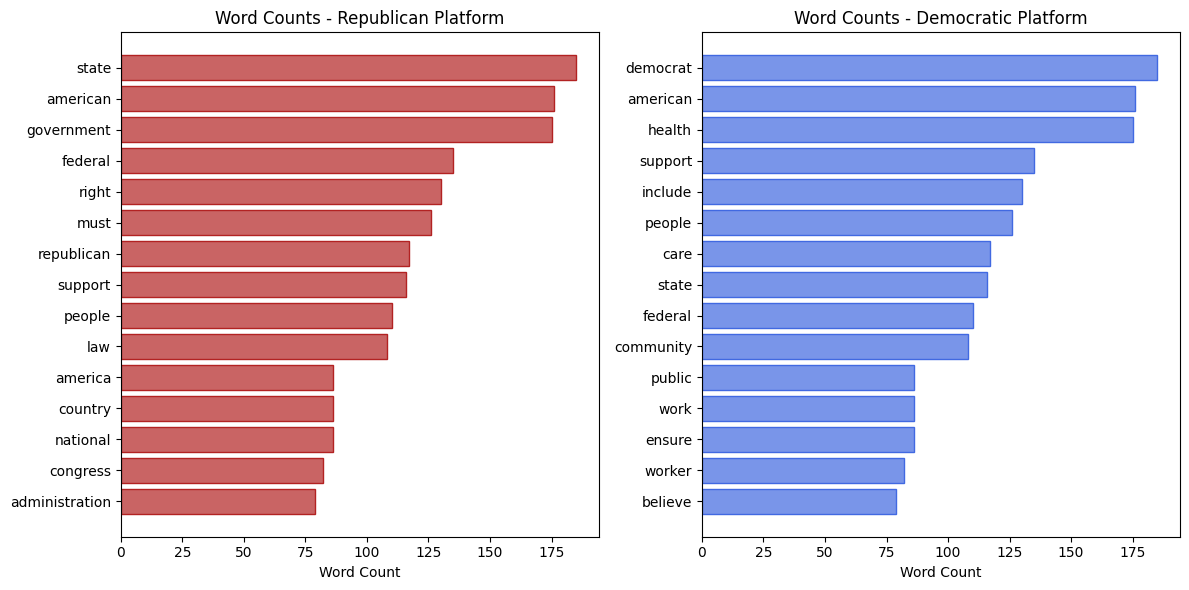

In [50]:
'''
Returns a list of words in [text] sorted by frequency
text: input text
vectorizer: sklearn Vectorizer; should already be fit
vocab: vocabulary of vectorizer
lemmatizer: NLTK lemmatizer to use when processing [text]
stop_words: set of stop words to use when processing [text]
'''
def get_counts(text, vectorizer, vocab, lemmatizer, stop_words):
    word_counts = vectorizer.transform([process(text, lemmatizer, stop_words)])
    word_counts_array = word_counts.toarray()[0]
    word_counts_dict = dict(zip(vocab, word_counts_array))
    sorted_word_counts = sorted(word_counts_dict.items(), key=lambda x: x[1], reverse=True)
    return sorted_word_counts

vocab = vectorizer.get_feature_names_out()

d2020_counts = get_counts(d2020, vectorizer, vocab, lemmatizer, stop_words)
r2020_counts = get_counts(r2020, vectorizer, vocab, lemmatizer, stop_words)

# Extract words and counts for plotting
words_d = [item[0] for item in d2020_counts[:15]][::-1]
counts_d = [item[1] for item in d2020_counts[:15]][::-1]

words_r = [item[0] for item in r2020_counts[:15]][::-1]
counts_r = [item[1] for item in r2020_counts[:15]][::-1]

# Create a horizontal bar chart
plt.figure(figsize=(12, 6))

ax1, ax2 = plt.subplot(121), plt.subplot(122)
ax1.barh(words_r, counts_r, edgecolor='firebrick', color=matplotlib.colors.colorConverter.to_rgba('firebrick', alpha=.7))
ax1.set_xlabel('Word Count')
ax1.set_title('Word Counts - Republican Platform')


ax2.barh(words_d, counts_r, edgecolor='royalblue', color=matplotlib.colors.colorConverter.to_rgba('royalblue', alpha=.7))
ax2.set_xlabel('Word Count')
ax2.set_title('Word Counts - Democratic Platform')


plt.tight_layout()

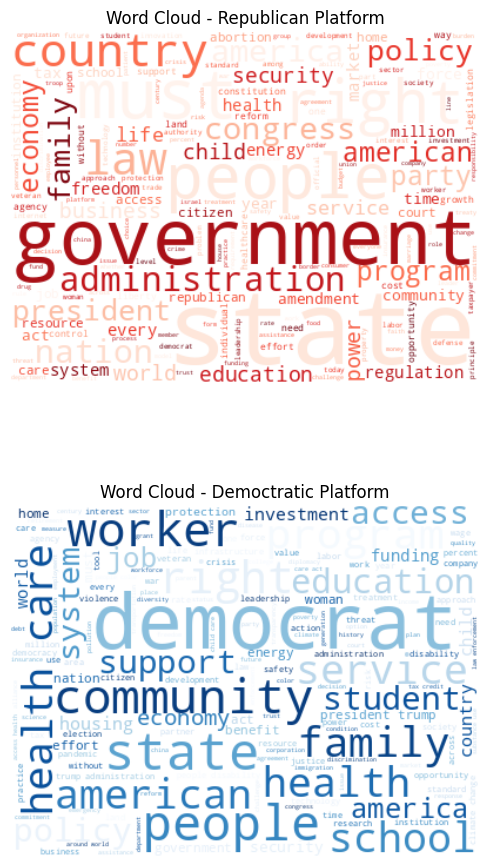

In [53]:
# Generate word clouds
wordcloud1 = WordCloud(width=400, height=300, background_color='white', colormap='Reds').generate(process(r2020, lemmatizer, stop_words, {'n'}))
wordcloud2 = WordCloud(width=400, height=300, background_color='white', colormap='Blues').generate(process(d2020, lemmatizer, stop_words, {'n'}))

# Plot word clouds side by side
plt.figure(figsize=(5, 10))

plt.subplot(2, 1, 1)  # Subplot 1
plt.imshow(wordcloud1, interpolation='bilinear')
plt.title('Word Cloud - Republican Platform')
plt.axis('off')

plt.subplot(2, 1, 2)  # Subplot 2
plt.imshow(wordcloud2, interpolation='bilinear')
plt.title('Word Cloud - Democtratic Platform')
plt.axis('off')

plt.tight_layout()
plt.show()

### NER Counts
Named Entity Recognition

In [54]:
from transformers import AutoTokenizer, AutoModelForTokenClassification
from transformers import pipeline

/mnt/c/Users/DaMarcus/Documents/proj/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2024-04-01 23:00:58.139984: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-04-01 23:01:04.057978: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-01 23:01:21.738014: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find

In [55]:
tokenizer = AutoTokenizer.from_pretrained("dslim/bert-large-NER")
model = AutoModelForTokenClassification.from_pretrained("dslim/bert-large-NER")

nlp = pipeline("ner", model=model, tokenizer=tokenizer)
example = "My name is Wolfgang and I live in Berlin"

ner_results = nlp(example)
print(ner_results)

Some weights of the model checkpoint at dslim/bert-large-NER were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


[{'entity': 'B-PER', 'score': 0.9971501, 'index': 4, 'word': 'Wolfgang', 'start': 11, 'end': 19}, {'entity': 'B-LOC', 'score': 0.9986046, 'index': 9, 'word': 'Berlin', 'start': 34, 'end': 40}]


In [56]:
ner_results_d = nlp(sent_tokenize(d2020))

In [57]:
sents = sent_tokenize(d2020)

In [58]:
sent_tokenize(d2020)[100:110][1][74:105]

'Americans with Disabilities Act'

In [59]:
from functools import reduce

In [60]:
'''
Helper function to return whole words from word tokens produced by tokenizer
text: original text used during named entity recognition / tokenization
entities: output of NER model
'''
def get_entities(text, entities):
    start, end = 0, 0
    nes = []
    latest_type = ''
    for entity in entities:
        latest_type = entity['entity']
        if latest_type.startswith('B'):
            if start != end:
                nes.append((latest_type[2:],text[start:end]))
                
            start = entity['start']
            end = entity['end']
        elif entity['entity'].startswith('I'):
            end = entity['end']
    if start != end:
        nes.append((latest_type[2:], text[start:end]))
    return nes

In [61]:
'''
Extracts named entities from text
text: input text
pipeline: named entity recognition pipeline
'''
def get_entity_list(text, pipeline):
    sents = sent_tokenize(text)
    ner_results = pipeline(sents)
    entities = list(map(lambda x: get_entities(x[0],x[1]), zip(sents, ner_results)))
    return reduce(lambda x, y:x+y, entities)

In [62]:
entities_d = get_entity_list(d2020, nlp)
entities_r = get_entity_list(r2020, nlp)

(-0.5, 399.5, 299.5, -0.5)

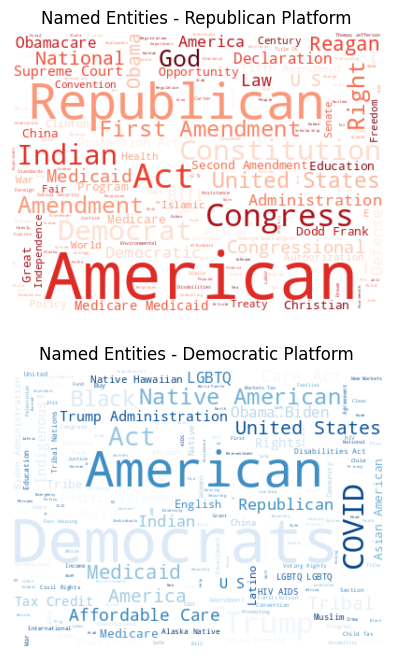

In [78]:
# Generate word clouds
wordcloud1 = WordCloud(width=400, height=300, background_color='white', colormap='Reds').generate(' '.join([w[1] for w in entities_r if w[0] in {'MISC','PER'}]))
wordcloud2 = WordCloud(width=400, height=300, background_color='white', colormap='Blues').generate(' '.join([w[1] for w in entities_d if w[0] in {'MISC','PER'}]))

# Plot word clouds side by side
plt.figure(figsize=(5,8))

plt.subplot(2,1, 1)  # Subplot 1
plt.imshow(wordcloud1, interpolation='bilinear')
plt.title('Named Entities - Republican Platform')
plt.axis('off')

plt.subplot(2,1, 2)  # Subplot 2
plt.imshow(wordcloud2, interpolation='bilinear')
plt.title('Named Entities - Democratic Platform')
plt.axis('off')

### Odds Ratios
Find words where the odds of appearing are much higher for one party than the other (BoW)

In [79]:
X = vectorizer.transform([process(d2020, lemmatizer, stop_words), process(r2020, lemmatizer, stop_words)])

In [80]:
D, R = X[0,:], X[1,:]

In [81]:
D = (D/D.sum()).toarray()
R = (R/R.sum()).toarray()

In [82]:
OR = D*(1-D)/(R*(1-R))

/tmp/ipykernel_247647/983455642.py:1: RuntimeWarning: divide by zero encountered in divide
  OR = D*(1-D)/(R*(1-R))


In [83]:
inds = np.argsort(OR, axis=None)[::-1]

In [84]:
inds_sub = inds[(OR[0][inds]>0)&(~np.isinf(OR[0][inds]))]
inds_none = inds[(OR[0][inds]<=0)|(np.isinf(OR[0][inds]))]

In [85]:
for i in inds_sub[-20:][::-1]: #3900
    print(OR[0][i], vocab[i])

0.018936383250047224 urge
0.04084079220239976 marriage
0.04564336445357414 congressional
0.04780324233897906 current
0.05172662288462581 god
0.05542002988811284 senate
0.05542002988811284 personnel
0.05542002988811284 therefore
0.05542002988811284 intend
0.05968165342468731 first amendment
0.06208591719155852 impose
0.07052942267862396 specie
0.07390459386522576 regulatory
0.07758047283213017 stem
0.08439431861462472 regulation
0.08619842312229249 belief
0.08619842312229249 given
0.08619842312229249 conscience
0.08619842312229249 whatever
0.08619842312229249 eight


In [86]:
inds_all = np.hstack([inds_sub[:15], inds_sub[-15:][::-1]])

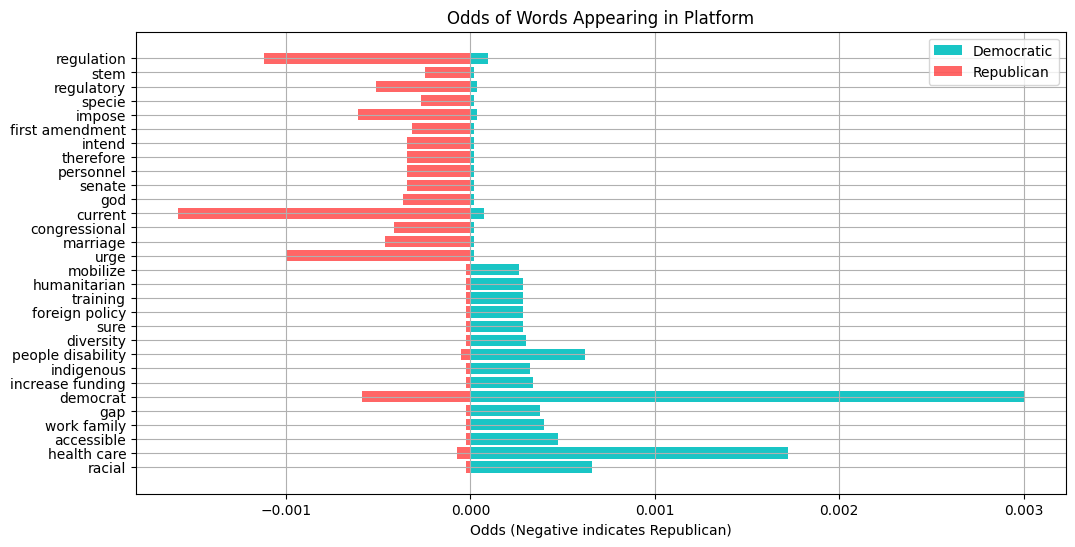

In [96]:
# create data
plt.figure(figsize=(12,6))
A = D[0][inds_all].clip(0,.003)
B = R[0][inds_all].clip(0,.003)
X = vocab[inds_all]
 
# plot the bars
plt.barh(X, A, align='center',
         alpha=0.9, color = 'c', label='Democratic')
 
plt.barh(X, -B, align='center', 
         alpha=0.6, color = 'r', label='Republican')
 
plt.grid()
plt.title("Odds of Words Appearing in Platform")
plt.xlabel("Odds (Negative indicates Republican)")
plt.legend()
plt.show()

## Neighborhood

In [89]:
'''
Helper function to search for occurrences of a keyword and print the surrounding text
text: input text
keyword: keyword to search for
k: the k characters before and after each instance of [keyword] in [text] will be printed
'''
def get_exerpts(text, keyword, k=250):
    indicies = [m.start() for m in re.finditer(keyword, text)]
    exerpts = []

    for i in indicies:
        exerpts.append(text[i-k:i+k])
    return exerpts

In [90]:
get_exerpts(r2020, 'urge')

["the American Dream\n\n9\n\nA Rebirth of Constitutional Government\n\n17\n\nAmerica's Natural Resources: Agriculture, Energy, and the Environment\n\n23\n\nGovernment Reform\n\n31\n\nGreat American Families, Education, Healthcare, and Criminal Justice\n\n41\n\nAmerica Resurgent\n\n\nRestoring the American Dream\nRebuilding the Economy and Creating Jobs\n\nWe are the party of a growing economy that gives everyone a chance in life, an opportunity to learn, work, and realize the prosperity freedom makes possible.\n\nGovernment ",
 "pete in an open market, and we believe public policies should encourage the innovation and competition that are essential for an Internet of Things to thrive.\n\nGovernment must keep pace with the technology deployed in the private sector. There is an urgent need to modernize the federal government's legacy systems and to recruit the skilled technical personnel who can advance the adoption of innovation in the public sector. At the cost of billions, the current

## Sentiment
To do positive/ negative sentiment analysis; as well as EmoRoBERTa

In [202]:
sents = sent_tokenize(d2020)# + sent_tokenize(r2020)
len_d = len(sents)
sents += sent_tokenize(r2020)

In [203]:
sentiment_df = pd.DataFrame({'Party':['D']*len_d + ['R']*(len(sents)-len_d), 'Sentence':sents})

In [97]:
from transformers import pipeline

In [194]:
sentiment = pipeline("sentiment-analysis", model="distilbert/distilbert-base-uncased-finetuned-sst-2-english")

In [195]:
sentiment('People living paycheck to paycheck are struggling, sacrificing, and suffering.')

[{'label': 'NEGATIVE', 'score': 0.9924622774124146}]

In [ ]:
distribution = pd.DataFrame(test_result, columns=emotion_labels).T.sort_values(by=0, ascending=True).iloc[-5:]#.plot(kind='pie')
# Plot donut chart
fig, ax = plt.subplots()

# explosion
explode = (0.05, 0.05, 0.05, 0.05, 0.05, .05)
 
# Pie Chart
plt.pie(distribution[0].tolist()+[1-distribution[0].sum()], labels=distribution.index.tolist()+['Other'],colors=['azure','lightskyblue','skyblue','dodgerblue','royalblue', 'aliceblue'],
        autopct='%1.1f%%', pctdistance=0.85,
        explode=explode)
 
# draw circle
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
 
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)
 
# Adding Title of chart
plt.title('Employee Salary Details')

 
# Displaying Chart
plt.show()
# Show plot
plt.show()

<Axes: >

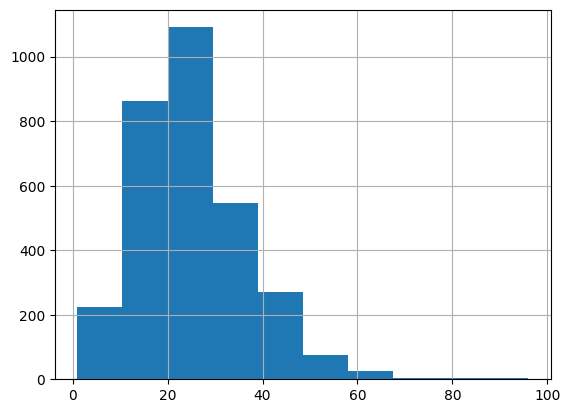

In [26]:
pd.Series([len(s.split(' ')) for s in sents]).hist()

In [ ]:
results = []
for i in range(0,len(sents), 100):
    print(i)
    result = sentiment(sents[i:i+100])
    results += [r['score'] if r['label'] == 'POSITIVE' else 1 - r['score'] for r in result]

In [29]:
sentiment_df['sentiment'] = results

In [35]:
sentiment_df.groupby(by=['Party']).mean(numeric_only=True)

,sentiment
Party,
D,0.686842
R,0.560947


In [47]:
sentiment = pipeline('sentiment-analysis', model='arpanghoshal/EmoRoBERTa')

All model checkpoint layers were used when initializing TFRobertaForSequenceClassification.

All the layers of TFRobertaForSequenceClassification were initialized from the model checkpoint at arpanghoshal/EmoRoBERTa.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaForSequenceClassification for predictions without further training.


In [48]:
sentiment(['People living paycheck to paycheck are struggling, sacrificing, and suffering.'])

[{'label': 'sadness', 'score': 0.9868255257606506}]

In [49]:
sentiment(['Our public schools are bedrock community institutions, and yet our educators are underpaid, our classrooms are overstuffed, and our school buildings have been neglected, especially in low-income neighborhoods and communities of color.'])

[{'label': 'disapproval', 'score': 0.2632899582386017}]

In [113]:
from scipy.special import softmax

In [197]:
from transformers import RobertaTokenizerFast, TFRobertaForSequenceClassification
tokenizer = RobertaTokenizerFast.from_pretrained("arpanghoshal/EmoRoBERTa")
sentiment = TFRobertaForSequenceClassification.from_pretrained("arpanghoshal/EmoRoBERTa")

All model checkpoint layers were used when initializing TFRobertaForSequenceClassification.

All the layers of TFRobertaForSequenceClassification were initialized from the model checkpoint at arpanghoshal/EmoRoBERTa.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaForSequenceClassification for predictions without further training.


In [105]:
emotions = 'admiration, amusement, anger, annoyance, approval, caring, confusion, curiosity, desire, disappointment, disapproval, disgust, embarrassment, excitement, fear, gratitude, grief, joy, love, nervousness, optimism, pride, realization, relief, remorse, sadness, surprise, neutral'
emotion_labels = [label.strip() for label in emotions.split(',')]

In [118]:
tokens = tokenizer(['Our public schools are bedrock community institutions, and yet our educators are underpaid, our classrooms are overstuffed, and our school buildings have been neglected, especially in low-income neighborhoods and communities of color.'], return_tensors='tf', padding=True)
test_result = softmax(sentiment(**tokens).logits, axis=1)

In [187]:
distribution[0].sum()

0.9796655

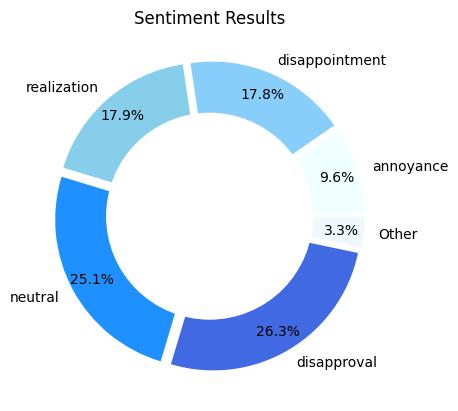

In [196]:
distribution = pd.DataFrame(test_result, columns=emotion_labels).T.sort_values(by=0, ascending=True).iloc[-5:]#.plot(kind='pie')
# Plot donut chart
fig, ax = plt.subplots()

# explosion
explode = (0.05, 0.05, 0.05, 0.05, 0.05, .05)
 
# Pie Chart
plt.pie(distribution[0].tolist()+[1-distribution[0].sum()], labels=distribution.index.tolist()+['Other'],colors=['azure','lightskyblue','skyblue','dodgerblue','royalblue', 'aliceblue'],
        autopct='%1.1f%%', pctdistance=0.85,
        explode=explode)
 
# draw circle
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
 
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)
 
# Adding Title of chart
plt.title('Sentiment Results')

 
# Displaying Chart
plt.show()
# Show plot
plt.show()

In [10]:
from transformers import pipeline

#emotion = pipeline('sentiment-analysis', 
#                    model='arpanghoshal/EmoRoBERTa')
sentiment = pipeline("sentiment-analysis", model="distilbert/distilbert-base-uncased-finetuned-sst-2-english")

/mnt/c/Users/DaMarcus/Documents/proj/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2024-03-22 16:34:55.136605: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-03-22 16:35:04.460307: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-22 16:35:17.181230: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find

In [207]:
results = []
for i in range(0,len(sents), 100):
    print(i)
    inputs = tokenizer(sents[i:i+100], return_tensors='tf', padding=True)
    results.append(sentiment(**inputs))

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100


In [208]:
results = np.vstack([result.logits for result in results])

In [209]:
sentiment_df[emotion_labels] = softmax(results, axis=1)

<Axes: title={'center': 'Emotions in Party Platforms, by Party'}>

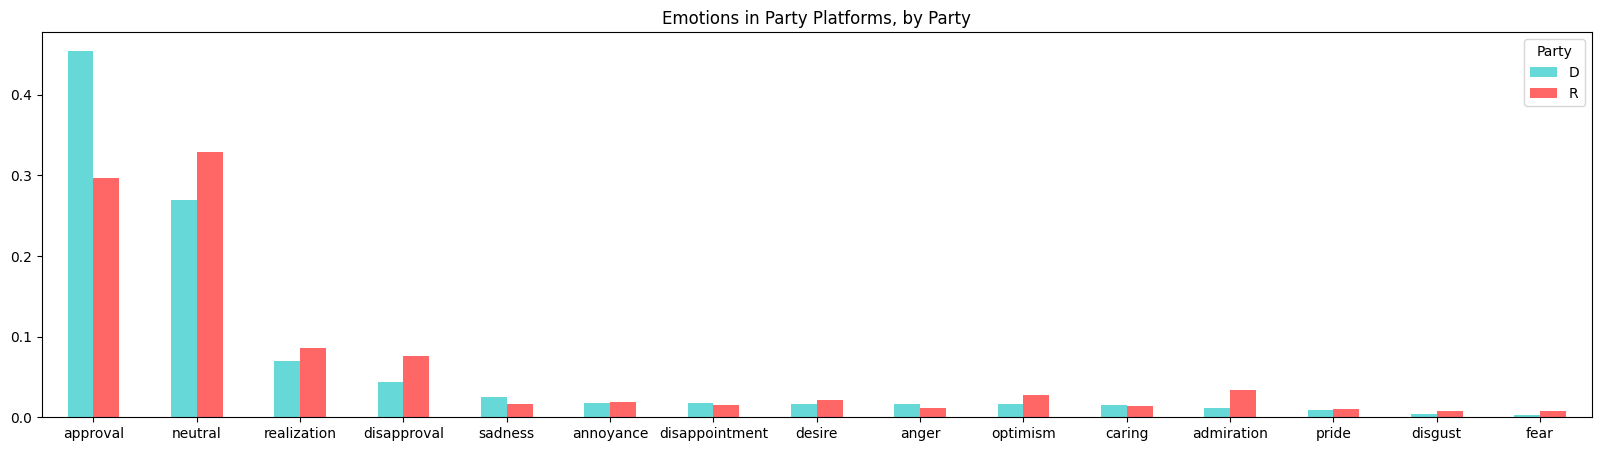

In [254]:

sentiment_df.groupby(by=['Party']).mean(numeric_only=True).T.sort_values(by=['D']).iloc[-15:][::-1].plot(title='Emotions in Party Platforms, by Party',kind='bar', figsize=(20,5), rot=0,color=['c','red'], alpha=.6)

In [288]:
'''
Sort texts by score of [emotion] returned by EmoRoBERTa and prints the top [k]
df: sentiment_df, in format above
emotion: emotion to display
k: top k texts will be displayed
'''
def display_most(df, emotion, k=5):
    rank_df = df.sort_values(by=[emotion], ascending=False)
    for i in range(k):
        print('-'*10 , 'Score: {0:.2f}'.format(rank_df[emotion].iloc[i]), '-'*10)
        idx = rank_df.iloc[i].name
        print('({0})'.format(rank_df['Party'].iloc[i]), df['Sentence'].iloc[max(0,idx-1)], rank_df['Sentence'].iloc[i])



In [332]:
display_most(sentiment_df, 'joy',k=10)

---------- Score: 0.95 ----------
(R) Failure to require a father to be equally responsible for a child places an inequitable burden on the mother, creating a financial and social hardship on both mother and child. We celebrate the millions of Americans who open their hearts, homes, and churches to mothers in need and women fleeing abuse.
---------- Score: 0.94 ----------
(R) No other nation has been as generous with food aid to the needy. We have good reason to celebrate our domestic security in food.
---------- Score: 0.88 ----------
(R) Their sacrifice and suffering must not be betrayed by the accession to power of murderers and drug lords. We want to welcome the people of Cuba back into our hemispheric family — after their corrupt rulers are forced from power and brought to account for their crimes against humanity.
---------- Score: 0.88 ----------
(D) Protecting Disability Rights

One in four American adults live with a disability. Democrats believe people with disabilities deser

In [312]:
sentiment_df['Sentence_Lemma'] = sentiment_df['Sentence'].apply(lambda x: process(x, lemmatizer, stop_words, pos={'n'}))

In [329]:
'''
Displays a word cloud using the texts scoring .3 or higher for [emotion] by EmoRoBERTa
df: sentiment_df in format above
emtion: emotion to filter for
'''
def word_cloud_by_emotion(df, emotion):
    # Generate word clouds
    wordcloud1 = WordCloud(width=400, height=300, background_color='white', colormap='Reds').generate(' '.join(df[(df['Party']=='R')&(df[emotion]>.3)]['Sentence_Lemma']))
    wordcloud2 = WordCloud(width=400, height=300, background_color='white', colormap='Blues').generate(' '.join(df[(df['Party']=='D')&(df[emotion]>.3)]['Sentence_Lemma']))
    
    # Plot word clouds side by side
    plt.figure(figsize=(10, 5))
    
    plt.subplot(1, 2, 1)  # Subplot 1
    plt.imshow(wordcloud1, interpolation='bilinear')
    plt.title(emotion.capitalize() + ' - ' + 'Republican Platform')
    plt.axis('off')
    
    plt.subplot(1, 2, 2)  # Subplot 2
    plt.imshow(wordcloud2, interpolation='bilinear')
    plt.title(emotion.capitalize() + ' - ' + 'Democratic Platform')
    plt.axis('off')
    
    plt.show()

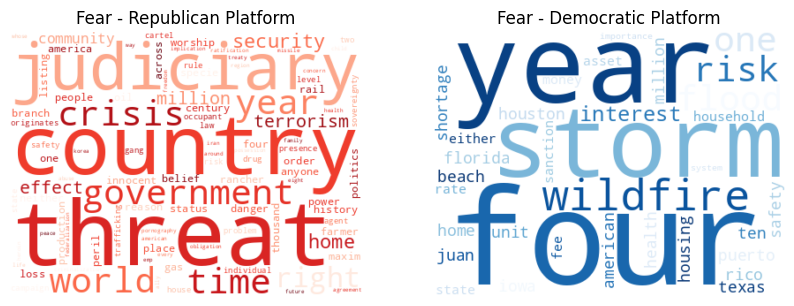

In [331]:
word_cloud_by_emotion(sentiment_df, 'fear')

# END